In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print("Num GPUs Available: ",len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
print(tf.version.VERSION)

2.6.0


In [5]:
import sys
sys.version

'3.9.16 (main, Jan 11 2023, 16:16:36) [MSC v.1916 64 bit (AMD64)]'

In [6]:
import numpy as np
import pickle
from os import listdir
import cv2

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.utils import class_weight

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten

from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
import os 
from random import shuffle

# Loading the Data

In [7]:
import numpy as np
import pandas as pd  
import os 
from sklearn.datasets import load_files

In [8]:
data_dir =  r'C:\Users\Lenovo\Desktop\Herbis_Universalis\gimage_scraper\scraped_images'
#Desktop\Herbis_Universalis\gimage_scraper\scraped_images
data = load_files(data_dir)

# Data Preprocessing and exploring

In [9]:
folders=os.listdir(r'C:\Users\Lenovo\Desktop\Herbis_Universalis\gimage_scraper\scraped_images')
print(folders)

['Agasta White', 'Aloe', 'Alstonia scholaris flower real', 'Amaranth leaf real', 'Black galingale root real', 'Bottle gourd fruit real', 'Butterfly pea', 'Cabbage leaf real', 'Celery leaf real', 'Centella asiatica leaf real', 'Cha-om', 'Chauya', 'Coccinia grandis', 'Common beet root real', 'Cucumber fruit real', 'Culantro leaf real', 'Esldpagpon', 'fahthalinejol', 'Garlic', 'Ginger root real', 'Ginseng root real', 'Greater galangal root real', 'Kai Lan leaf real', 'Lemon basil leaf real', 'Lemongrass tree real', 'Makham', 'Moringa sheath real', 'mulberry', 'Pandan leaves real', 'Piper nigrum fruit real', 'Punica granatum fruit real', 'Rambutan fruit real', 'Sesbania javanica Miq flower real', 'Shallot', 'Siamese senna flower real', 'Stevia leaf real', 'Sugar cane trunk real', 'Sweet peas', 'Tinospora crispa', 'Turmeric root real', 'Watermelon fruit real']


In [10]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])

print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['C:\\Users\\Lenovo\\Desktop\\Herbis_Universalis\\gimage_scraper\\scraped_images\\Stevia leaf real\\21.jpg'
 'C:\\Users\\Lenovo\\Desktop\\Herbis_Universalis\\gimage_scraper\\scraped_images\\Alstonia scholaris flower real\\3.jpg'
 'C:\\Users\\Lenovo\\Desktop\\Herbis_Universalis\\gimage_scraper\\scraped_images\\Kai Lan leaf real\\3.jpg'
 'C:\\Users\\Lenovo\\Desktop\\Herbis_Universalis\\gimage_scraper\\scraped_images\\Centella asiatica leaf real\\25.jpg'
 'C:\\Users\\Lenovo\\Desktop\\Herbis_Universalis\\gimage_scraper\\scraped_images\\Lemongrass tree real\\3.jpg'
 'C:\\Users\\Lenovo\\Desktop\\Herbis_Universalis\\gimage_scraper\\scraped_images\\Ginger root real\\16.jpg'
 'C:\\Users\\Lenovo\\Desktop\\Herbis_Universalis\\gimage_scraper\\scraped_images\\Ginseng root real\\58.jpg'
 'C:\\Users\\Lenovo\\Desktop\\Herbis_Universalis\\gimage_scraper\\scraped_images\\Agasta White\\61.jpg'
 'C:\\Users\\Lenovo\\Desktop\\Herbis_Universalis\\gimage_scraper\\scraped_images\\Culantro leaf re

# Load the images

In [11]:
from keras.preprocessing.image import img_to_array, load_img

def convert_img_to_arr(file_path_list):
    arr = []
    img_width, img_height = 128,128
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
        
    return arr
 
X = np.array(convert_img_to_arr(X))
print(X.shape)
print(y.shape)

(675, 128, 128, 3)
(675,)


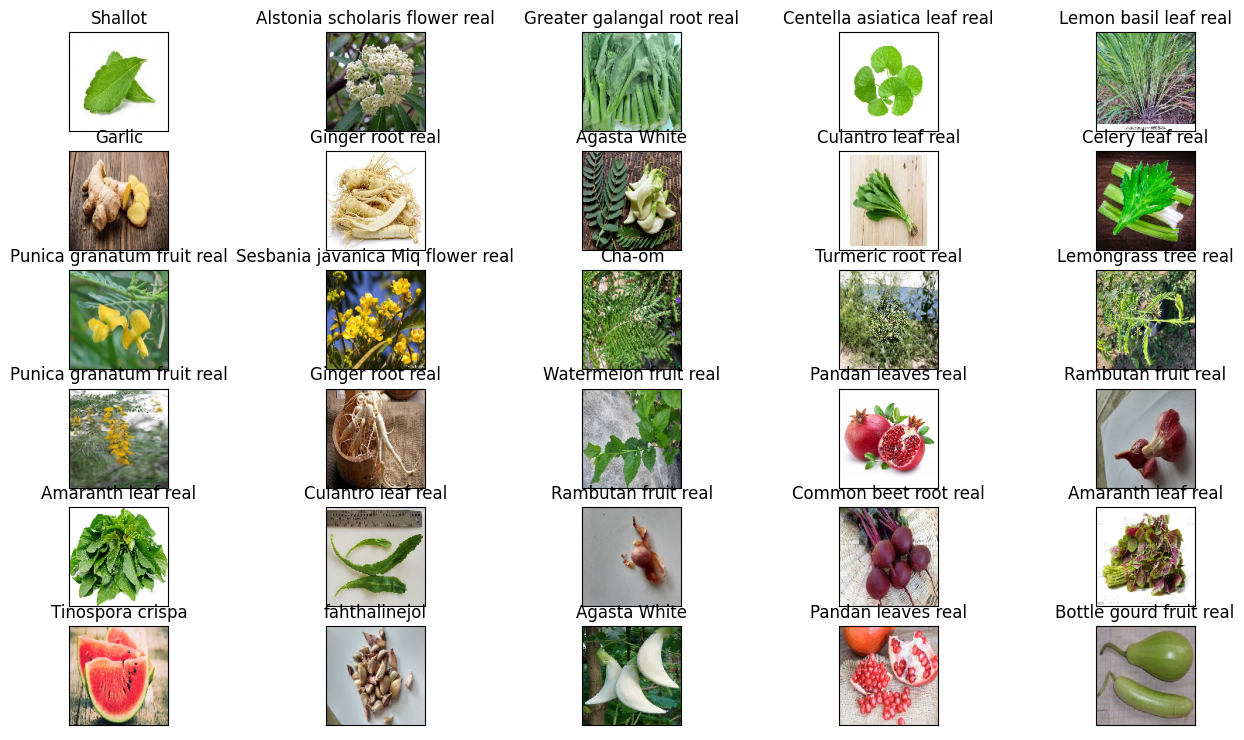

In [12]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize = (16,9))
for i in range(30):
    ax = fig.add_subplot(6,5,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title(folders[y[i]])

In [13]:
X = X.astype('float32')/255
no_of_classes = len(np.unique(y))
no_of_classes

41

In [14]:
y

array([33,  2, 21,  9, 23, 18, 19,  0, 15,  8, 30, 32, 10, 39, 24, 30, 19,
       40, 28, 31,  3, 15, 31, 13,  3, 38, 17,  0, 28,  5, 34,  7, 13,  3,
        4, 40, 25, 34, 28, 36, 19, 24, 31,  8, 40, 18, 37, 21,  5, 28, 31,
       15, 10, 23, 18, 18, 27,  7, 18,  5,  3, 25, 37, 27,  3,  3,  3, 24,
       14, 10, 25,  3, 22, 19, 30, 34, 14, 14, 29,  1, 27, 38,  3,  3, 31,
       27,  3, 26,  9, 29, 22, 39,  1, 19, 32, 28, 22, 31, 22, 30, 19, 12,
        0, 39, 37, 12, 29, 35,  6, 38, 32,  3,  8, 20, 28, 25,  7, 29, 21,
        0,  2, 14, 32, 26, 28, 34, 33,  3,  1, 27, 29, 24,  3,  8, 40, 37,
       19,  5, 15,  9,  7,  7, 38, 23, 16, 40, 14, 16,  2, 27,  8, 26, 22,
       13, 19,  8, 27,  0, 10, 17,  8, 23,  3,  4, 25,  3, 20, 29, 37, 37,
       31, 35,  0,  9, 35,  0, 15, 15, 24, 28, 33, 27, 36, 21, 30, 24,  4,
       34, 19,  5, 12, 38, 29, 25, 16,  5, 14, 30,  9, 23, 22, 17, 11, 30,
       17,  9, 23, 34, 14, 34, 18,  6,  8,  8, 37, 19,  8,  4, 37, 38, 35,
       10, 15, 15,  4, 26

# converts a class vector (integers) to binary class matrix

In [15]:
from keras.utils import np_utils
y = np.array(np_utils.to_categorical(y,no_of_classes))
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
 #80% train, 10% validation, and 10% test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,shuffle=True)

X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.15)

In [17]:
print('The train Data Shape ', X_train.shape[1:])

The train Data Shape  (128, 128, 3)


# Model

In [18]:
base_model =tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False,input_shape=(128,128,3))

In [19]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [20]:
base_model.trainable = False

# Add head 

In [21]:
average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer = tf.keras.layers.Dense(units=no_of_classes,activation='softmax')(average_pooling_layer)

In [22]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

# train model

In [24]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss="categorical_crossentropy",metrics=["accuracy"])

C:\Users\Lenovo\anaconda3\envs\Tensorflow_GPU\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [25]:
model.fit(X_train,y_train,epochs=150,validation_data=(X_valid,y_valid),batch_size=128)

Epoch 1/150
4/4 [==============================] - 21s 1s/step - loss: 4.4476 - accuracy: 0.0297 - val_loss: 4.1617 - val_accuracy: 0.0645
Epoch 2/150
4/4 [==============================] - 0s 87ms/step - loss: 4.1734 - accuracy: 0.0360 - val_loss: 4.0421 - val_accuracy: 0.0645
Epoch 3/150
4/4 [==============================] - 0s 83ms/step - loss: 4.0026 - accuracy: 0.0403 - val_loss: 3.9477 - val_accuracy: 0.0645
Epoch 4/150
4/4 [==============================] - 0s 89ms/step - loss: 3.8639 - accuracy: 0.0466 - val_loss: 3.8645 - val_accuracy: 0.0645
Epoch 5/150
4/4 [==============================] - 0s 84ms/step - loss: 3.7422 - accuracy: 0.0508 - val_loss: 3.7922 - val_accuracy: 0.0645
Epoch 6/150
4/4 [==============================] - 0s 84ms/step - loss: 3.6309 - accuracy: 0.0678 - val_loss: 3.7291 - val_accuracy: 0.0323
Epoch 7/150
4/4 [==============================] - 0s 83ms/step - loss: 3.5281 - accuracy: 0.0784 - val_loss: 3.6680 - val_accuracy: 0.0323
Epoch 8/150
4/4 [====

4/4 [==============================] - 0s 84ms/step - loss: 0.7144 - accuracy: 0.9131 - val_loss: 1.6104 - val_accuracy: 0.6452
Epoch 60/150
4/4 [==============================] - 0s 84ms/step - loss: 0.6911 - accuracy: 0.9216 - val_loss: 1.5908 - val_accuracy: 0.6452
Epoch 61/150
4/4 [==============================] - 0s 85ms/step - loss: 0.6698 - accuracy: 0.9258 - val_loss: 1.5734 - val_accuracy: 0.6452
Epoch 62/150
4/4 [==============================] - 0s 90ms/step - loss: 0.6491 - accuracy: 0.9301 - val_loss: 1.5541 - val_accuracy: 0.6452
Epoch 63/150
4/4 [==============================] - 0s 91ms/step - loss: 0.6284 - accuracy: 0.9322 - val_loss: 1.5342 - val_accuracy: 0.6452
Epoch 64/150
4/4 [==============================] - 0s 86ms/step - loss: 0.6085 - accuracy: 0.9343 - val_loss: 1.5177 - val_accuracy: 0.6774
Epoch 65/150
4/4 [==============================] - 0s 86ms/step - loss: 0.5887 - accuracy: 0.9364 - val_loss: 1.4997 - val_accuracy: 0.6774
Epoch 66/150
4/4 [========

4/4 [==============================] - 0s 84ms/step - loss: 0.1261 - accuracy: 0.9915 - val_loss: 1.0316 - val_accuracy: 0.7742
Epoch 118/150
4/4 [==============================] - 0s 84ms/step - loss: 0.1227 - accuracy: 0.9915 - val_loss: 1.0303 - val_accuracy: 0.7742
Epoch 119/150
4/4 [==============================] - 0s 89ms/step - loss: 0.1194 - accuracy: 0.9915 - val_loss: 1.0255 - val_accuracy: 0.7742
Epoch 120/150
4/4 [==============================] - 0s 88ms/step - loss: 0.1167 - accuracy: 0.9936 - val_loss: 1.0211 - val_accuracy: 0.7742
Epoch 121/150
4/4 [==============================] - 0s 95ms/step - loss: 0.1137 - accuracy: 0.9915 - val_loss: 1.0183 - val_accuracy: 0.7742
Epoch 122/150
4/4 [==============================] - 0s 83ms/step - loss: 0.1105 - accuracy: 0.9915 - val_loss: 1.0143 - val_accuracy: 0.7742
Epoch 123/150
4/4 [==============================] - 0s 83ms/step - loss: 0.1076 - accuracy: 0.9936 - val_loss: 1.0085 - val_accuracy: 0.7742
Epoch 124/150
4/4 [=

In [26]:
(eval_loss, eval_accuracy) = model.evaluate(X_test, y_test, batch_size= 128, verbose=2)
print("Accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("Loss: {}".format(eval_loss))

2/2 - 1s - loss: 1.0568 - accuracy: 0.6744
Accuracy: 67.44%
Loss: 1.0568314790725708


# Acuuracy and Loss graphs

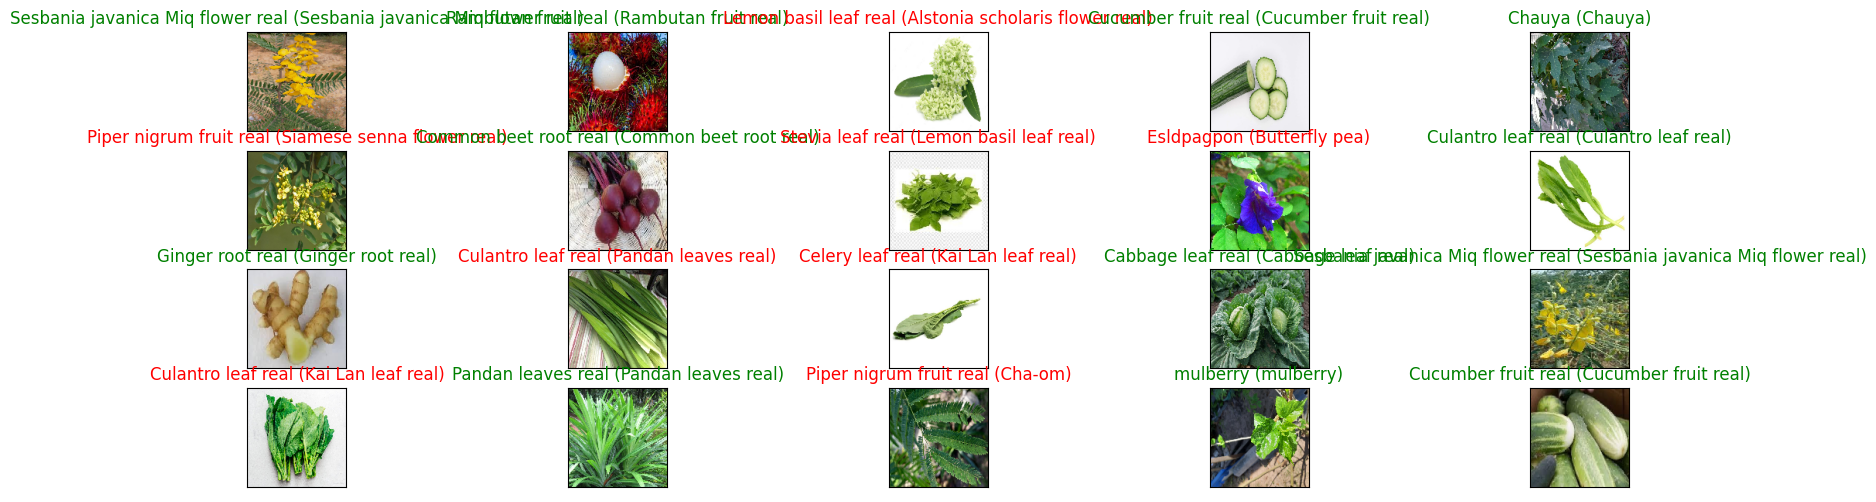

In [27]:
def visualize_pred(y_pred):
    fig = plt.figure(figsize=(20, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=20, replace=False)):
        ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(model.predict(X_test))

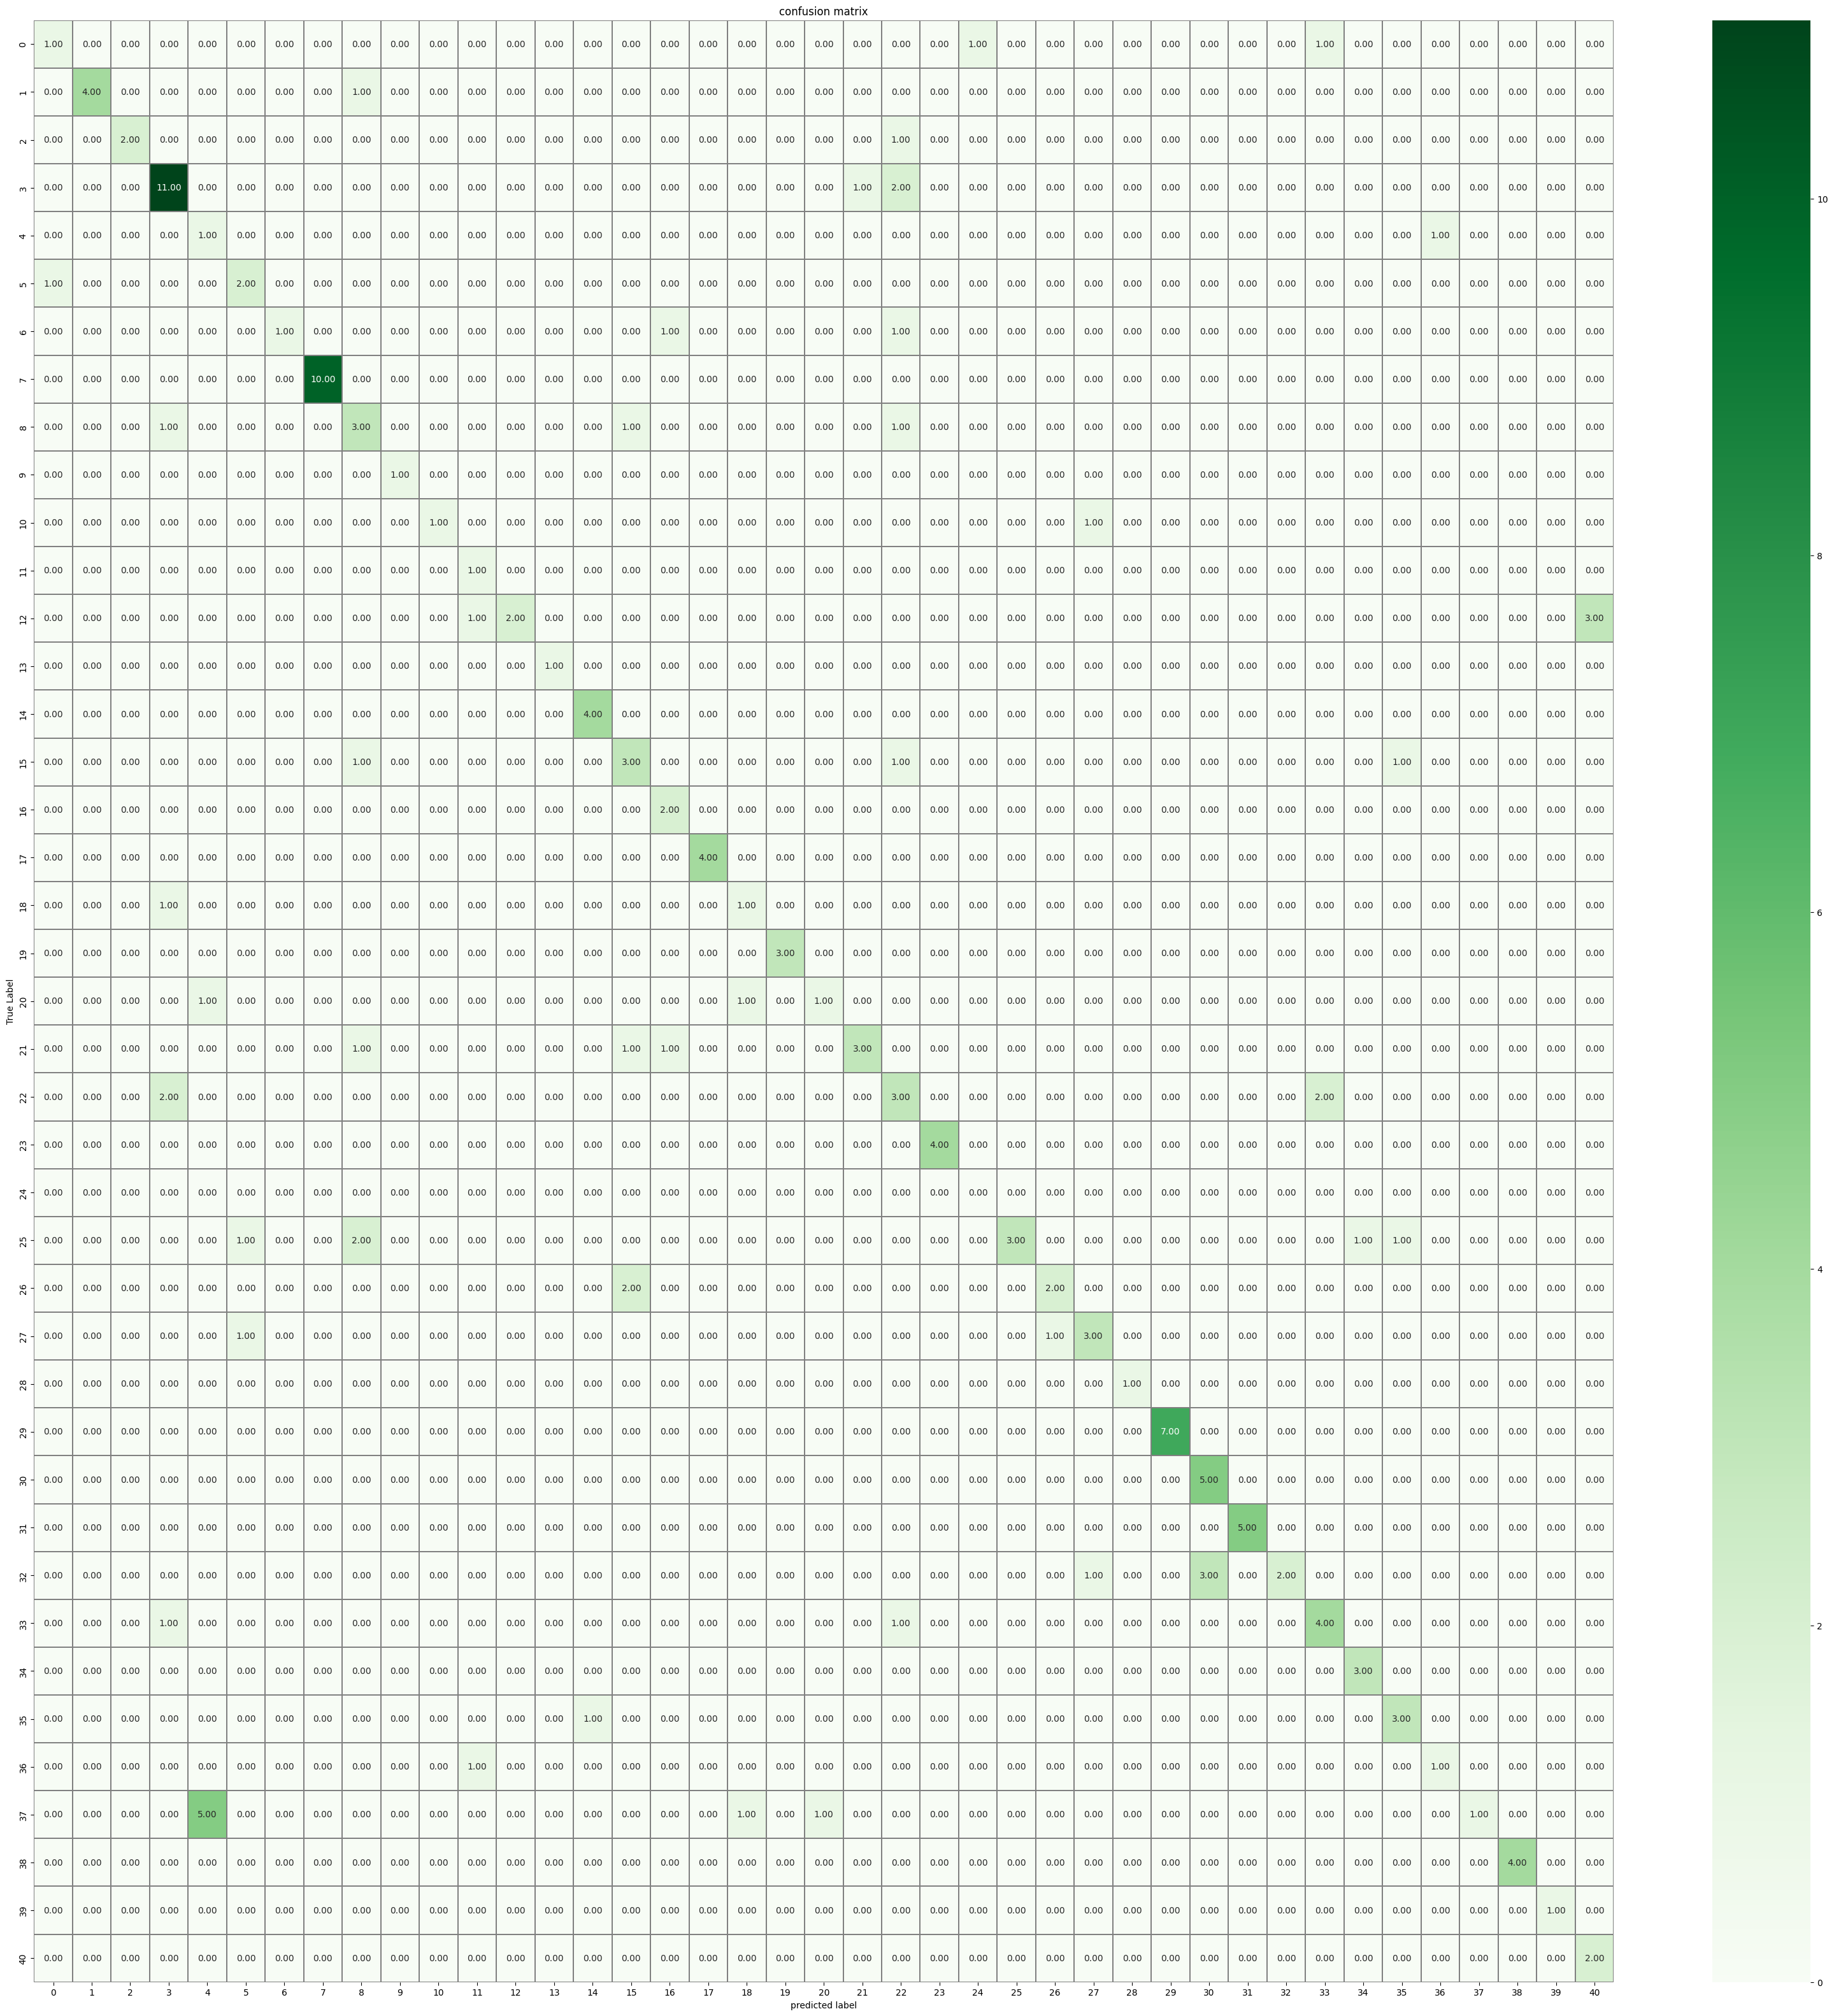

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (40,40))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
len(model.layers)

156

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
print("*******************Confusion matrix*******************")
print(confusion_matrix(Y_true,Y_pred_classes))
print("\n*******************Classification report*******************")
print(classification_report(Y_true,Y_pred_classes))

*******************Confusion matrix*******************
[[1 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]

*******************Classification report*******************
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      0.80      0.89         5
           2       1.00      0.67      0.80         3
           3       0.69      0.79      0.73        14
           4       0.14      0.50      0.22         2
           5       0.50      0.67      0.57         3
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00        10
           8       0.38      0.50      0.43         6
           9       1.00      1.00      1.00         1
          10       1.00      0.50      0.67         2
          11       0.33      1.00      0.50         1
          12       1.00      0.33      0.50         6
       

C:\Users\Lenovo\anaconda3\envs\Tensorflow_GPU\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\envs\Tensorflow_GPU\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\envs\Tensorflow_GPU\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
